In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
heart= pd.read_csv('heart_attack_prediction.csv')

In [3]:
heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
heart = heart.drop(columns=['Country', 'Continent','Hemisphere'])

In [5]:
heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [7]:
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
heart['Diet'] = heart['Diet'].map(ordinal_map)


In [8]:
heart.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,1.007874,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.817134,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,1.000000,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [9]:
ordinal_map_sex= {'Male':0, 'Female':1}
heart['Sex']=heart['Sex'].map(ordinal_map_sex)
heart.head(5)



,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
heart['Patient ID'] = encoder.fit_transform(heart['Patient ID'])


In [11]:
heart[['BP_Systolic', 'BP_Diastolic']] = heart['Blood Pressure'].str.split('/', expand=True)

# Convert the columns to numeric
heart['BP_Systolic'] = pd.to_numeric(heart['BP_Systolic'])
heart['BP_Diastolic'] = pd.to_numeric(heart['BP_Diastolic'])
heart = heart.drop('Blood Pressure', axis=1)

In [12]:
heart.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
BP_Systolic                        0
BP_Diastolic                       0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

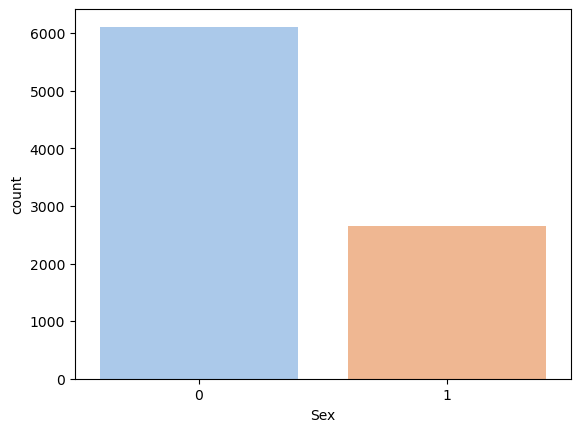

In [13]:
sns.countplot(data=heart, x='Sex', palette= 'pastel')

In [15]:
# specifying target and features
heart.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk', 'BP_Systolic',
       'BP_Diastolic'],
      dtype='object')

<Axes: xlabel='Age', ylabel='BMI'>

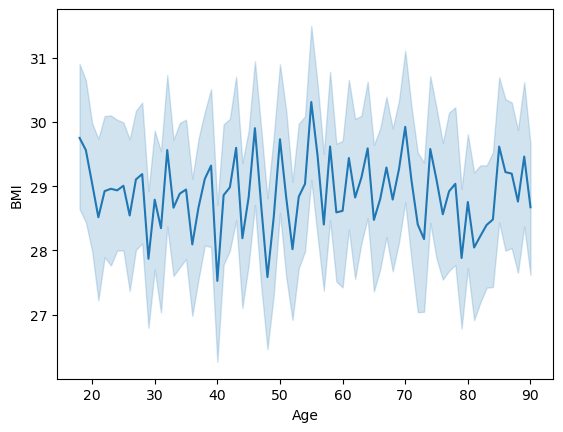

In [39]:
sns.lineplot(data=heart, x='Age', y='BMI', seed=None)


In [16]:
X= heart[['Patient ID', 'Age', 'Sex', 'Cholesterol',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'BP_Systolic', 'BP_Diastolic']]

In [17]:
y= heart['Heart Attack Risk']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
                                                    
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
                       

In [19]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [21]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
predictions = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
cm=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))

cr=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

[[1140    2]
 [  43  568]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1142
           1       1.00      0.93      0.96       611

    accuracy                           0.97      1753
   macro avg       0.98      0.96      0.97      1753
weighted avg       0.98      0.97      0.97      1753



In [25]:
ar=accuracy_score(y_test, predictions)
print(accuracy_score(y_test, predictions))

0.9743297204791785


<Axes: >

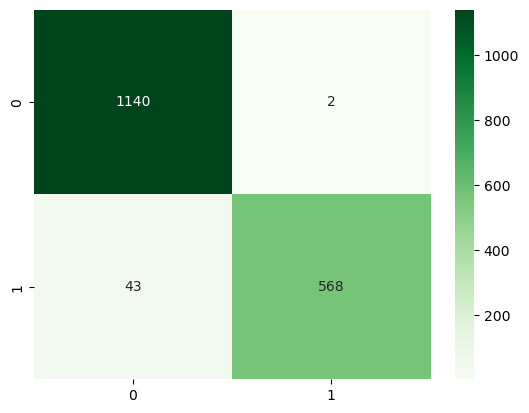

In [26]:
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')

In [27]:
# 568= TP, CORRECTLY PREDICTED TO BE AT RISK OF HAVING HEART ATTACK :(
# 1140 = TN, CORRECTLY PREDICATED TO NOT BE AT RISK OF HEART ATTACK :)
# 2= FP, FALSLY PREDICATED TO HAVE RISK OF HEART ATTACK
# 43= FN, FALSLY PREDICTED TO HAVE NO RISK OF HEART ATTACK